In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# find the path
path = os.getcwd()
print('This code is in: ', path)

# find the train_data folder
train_data_path = os.path.join(path, 'Alexnet_train_data')
print('The training data are saved in: ', train_data_path)

# find all the folders in the train_data folder
train_data_folders = os.listdir(train_data_path)
print('The folders in the training data folder are: ', train_data_folders)

This code is in:  /Users/dtjgp/Learning/GreenAI/GPU/universal
The training data are saved in:  /Users/dtjgp/Learning/GreenAI/GPU/universal/Alexnet_train_data
The folders in the training data folder are:  ['round10', 'round4', 'round3', 'round2', 'round5', 'round7', 'round9', 'round8', 'round6', 'round1']


In [3]:
subfolder = []
for round in train_data_folders:
    subfolder.append(os.path.join(train_data_path, round))
print('The subfolders are: ', subfolder)

The subfolders are:  ['/Users/dtjgp/Learning/GreenAI/GPU/universal/Alexnet_train_data/round10', '/Users/dtjgp/Learning/GreenAI/GPU/universal/Alexnet_train_data/round4', '/Users/dtjgp/Learning/GreenAI/GPU/universal/Alexnet_train_data/round3', '/Users/dtjgp/Learning/GreenAI/GPU/universal/Alexnet_train_data/round2', '/Users/dtjgp/Learning/GreenAI/GPU/universal/Alexnet_train_data/round5', '/Users/dtjgp/Learning/GreenAI/GPU/universal/Alexnet_train_data/round7', '/Users/dtjgp/Learning/GreenAI/GPU/universal/Alexnet_train_data/round9', '/Users/dtjgp/Learning/GreenAI/GPU/universal/Alexnet_train_data/round8', '/Users/dtjgp/Learning/GreenAI/GPU/universal/Alexnet_train_data/round6', '/Users/dtjgp/Learning/GreenAI/GPU/universal/Alexnet_train_data/round1']


In [4]:
for i in subfolder:
    filesi = os.listdir(i)
    print('The files in the subfolder are: ', filesi)

The files in the subfolder are:  ['TrainLoss.npy', 'Time_AllEpochs.npy', 'TestAcc.npy', 'TrainTime.npy', 'TimeEpoch.npy', 'TrainAcc.npy', 'TTrainAccLoss.npy', 'Energy_AllEpochs.npy']
The files in the subfolder are:  ['TrainLoss.npy', 'Time_AllEpochs.npy', 'TestAcc.npy', 'TrainTime.npy', 'TimeEpoch.npy', 'TrainAcc.npy', 'TTrainAccLoss.npy', 'Energy_AllEpochs.npy']
The files in the subfolder are:  ['TrainLoss.npy', 'Time_AllEpochs.npy', 'TestAcc.npy', 'TrainTime.npy', 'TimeEpoch.npy', 'TrainAcc.npy', 'TTrainAccLoss.npy', 'Energy_AllEpochs.npy']
The files in the subfolder are:  ['TrainLoss.npy', 'Time_AllEpochs.npy', 'TestAcc.npy', 'TrainTime.npy', 'TimeEpoch.npy', 'TrainAcc.npy', 'TTrainAccLoss.npy', 'Energy_AllEpochs.npy']
The files in the subfolder are:  ['TrainLoss.npy', 'Time_AllEpochs.npy', 'TestAcc.npy', 'TrainTime.npy', 'TimeEpoch.npy', 'TrainAcc.npy', 'TTrainAccLoss.npy', 'Energy_AllEpochs.npy']
The files in the subfolder are:  ['TrainLoss.npy', 'Time_AllEpochs.npy', 'TestAcc.npy

In [5]:
Round = 10
Epoch = 10

In [6]:
Time_AllRound = np.zeros((Round,Epoch,6))
Energy_AllRound = np.zeros((Round,Epoch,1), dtype=object)
TrainTime_AllRound = np.zeros((Round,Epoch,1))
TimeEpoch_AllRound = np.zeros((Round,Epoch,1))
TrainLoss_AllRound = np.zeros((Round,Epoch,1))
TrainAcc_AllRound = np.zeros((Round,Epoch,1))
TestAcc_AllRound = np.zeros((Round,Epoch,1))
TTrainEval_AllRound = np.zeros((Round,Epoch,1))

In [7]:
for round in range(len(subfolder)):
    Time_AllEpochsi = np.load(os.path.join(subfolder[round], 'Time_AllEpochs.npy'), allow_pickle=True).reshape(Epoch,6)
    Energy_AllEpochsi = np.load(os.path.join(subfolder[round], 'Energy_AllEpochs.npy'), allow_pickle=True)
    TTrainEvali = np.load(os.path.join(subfolder[round], 'TTrainAccLoss.npy'), allow_pickle=True).reshape(Epoch,1)
    TrainTimei = np.load(os.path.join(subfolder[round], 'TrainTime.npy'), allow_pickle=True).reshape(Epoch,1)
    TimeEpochi = np.load(os.path.join(subfolder[round], 'TimeEpoch.npy'), allow_pickle=True).reshape(Epoch,1)
    TrainLossi = np.load(os.path.join(subfolder[round], 'TrainLoss.npy'), allow_pickle=True)
    TrainAcci = np.load(os.path.join(subfolder[round], 'TrainAcc.npy'), allow_pickle=True)
    TestAcci = np.load(os.path.join(subfolder[round], 'TestAcc.npy'), allow_pickle=True).reshape(Epoch,1)
    Time_AllRound[round,:,:] = Time_AllEpochsi
    Energy_AllRound[round,:,:] = Energy_AllEpochsi
    TrainTime_AllRound[round,:,:] = TrainTimei
    TimeEpoch_AllRound[round,:,:] = TimeEpochi
    TrainLoss_AllRound[round,:,:] = TrainLossi
    TrainAcc_AllRound[round,:,:] = TrainAcci
    TestAcc_AllRound[round,:,:] = TestAcci
    TTrainEval_AllRound[round,:,:] = TTrainEvali

#### Time_AllRound

In [8]:
print(Time_AllRound.shape)

(10, 10, 6)


对10个epoch的数据要进行平均

In [12]:
# sum the Time_AllRound according to the epochs
Time_AllRoundSum = np.sum(Time_AllRound, axis=0)
# print(Time_AllRoundSum.shape)
# print(Time_AllRoundSum)
print('*'*50)
# each point divide by the number of rounds
Time_AllRoundAvg = Time_AllRoundSum/Round
print(Time_AllRoundAvg.shape)
print(Time_AllRoundAvg)

(10, 6)
[[ 20.14341664 112.58104849   0.99306297 226.00848436   9.88572907
   27.87588096]
 [ 20.22273064 112.8124156    1.12357163 227.5744555   10.010818
   27.98003149]
 [ 20.27024889 112.97316194   1.3220458  228.33066344   9.98086357
   28.01846123]
 [ 20.21342802 113.3932848    1.33123231 228.94353533   9.93829036
   28.03356671]
 [ 20.1910758  113.56389904   1.35307455 229.19308233   9.93981266
   28.06860447]
 [ 20.22285557 113.69875908   1.35712886 229.39834499   9.91808701
   28.16575956]
 [ 20.25533175 113.74098897   1.43833208 229.547153     9.94788384
   28.15047145]
 [ 20.22598791 113.82000065   1.44038844 229.62312031   9.9433465
   28.13935089]
 [ 20.21817923 113.88314843   1.44373798 229.7412529    9.93211412
   28.16523504]
 [ 20.20416856 113.98806      1.48649359 229.87987852   9.95213103
   28.1721065 ]]
**************************************************
(10, 6)
[[ 2.01434166 11.25810485  0.0993063  22.60084844  0.98857291  2.7875881 ]
 [ 2.02227306 11.28124156  0.1

In [14]:
print('For each epoch, the time of each layer is: \n', 
      'The Time to Device time of all epoch: \n', Time_AllRoundAvg[:,0].T, '\n',
      'The Forward time of all epoch: \n', Time_AllRoundAvg[:,1].T, '\n',
      'The Calculate Loss time of all epoch: \n', Time_AllRoundAvg[:,2].T, '\n',
      'The Backward time of all epoch: \n', Time_AllRoundAvg[:,3].T, '\n',
      'The Optimize time of all epoch: \n', Time_AllRoundAvg[:,4].T, '\n',
      'The Test time of all epoch: \n', Time_AllRoundAvg[:,5].T)

For each epoch, the time of each layer is: 
 The Time to Device time of all epoch: 
 [2.01434166 2.02227306 2.02702489 2.0213428  2.01910758 2.02228556
 2.02553318 2.02259879 2.02181792 2.02041686] 
 The Forward time of all epoch: 
 [11.25810485 11.28124156 11.29731619 11.33932848 11.3563899  11.36987591
 11.3740989  11.38200006 11.38831484 11.398806  ] 
 The Calculate Loss time of all epoch: 
 [0.0993063  0.11235716 0.13220458 0.13312323 0.13530746 0.13571289
 0.14383321 0.14403884 0.1443738  0.14864936] 
 The Backward time of all epoch: 
 [22.60084844 22.75744555 22.83306634 22.89435353 22.91930823 22.9398345
 22.9547153  22.96231203 22.97412529 22.98798785] 
 The Optimize time of all epoch: 
 [0.98857291 1.0010818  0.99808636 0.99382904 0.99398127 0.9918087
 0.99478838 0.99433465 0.99321141 0.9952131 ] 
 The Test time of all epoch: 
 [2.7875881  2.79800315 2.80184612 2.80335667 2.80686045 2.81657596
 2.81504714 2.81393509 2.8165235  2.81721065]


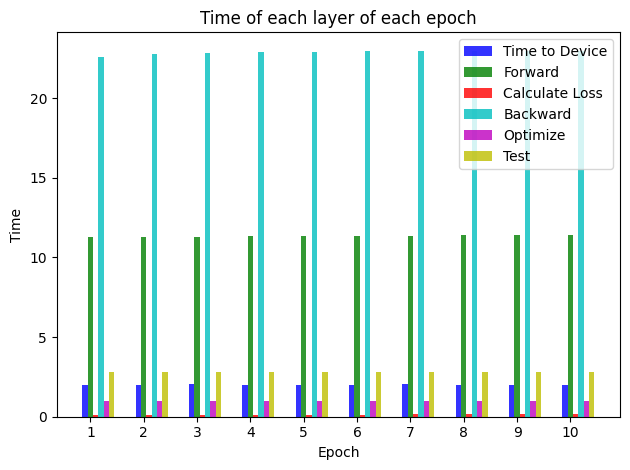

In [15]:
# plot each epoch's time to device, forward, calculate loss, backward, optimize, test using matplotlib with bar chart in one figure
fig, ax = plt.subplots()
index = np.arange(10)
bar_width = 0.1
opacity = 0.8
rects1 = plt.bar(index, Time_AllRoundAvg[:,0].T, bar_width, alpha=opacity, color='b', label='Time to Device')
rects2 = plt.bar(index+bar_width, Time_AllRoundAvg[:,1].T, bar_width, alpha=opacity, color='g', label='Forward')
rects3 = plt.bar(index+2*bar_width, Time_AllRoundAvg[:,2].T, bar_width, alpha=opacity, color='r', label='Calculate Loss')
rects4 = plt.bar(index+3*bar_width, Time_AllRoundAvg[:,3].T, bar_width, alpha=opacity, color='c', label='Backward')
rects5 = plt.bar(index+4*bar_width, Time_AllRoundAvg[:,4].T, bar_width, alpha=opacity, color='m', label='Optimize')
rects6 = plt.bar(index+5*bar_width, Time_AllRoundAvg[:,5].T, bar_width, alpha=opacity, color='y', label='Test')
plt.xlabel('Epoch')
plt.ylabel('Time')
plt.title('Time of each layer of each epoch')
plt.xticks(index + bar_width, ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))
plt.legend()
plt.tight_layout()
plt.show()

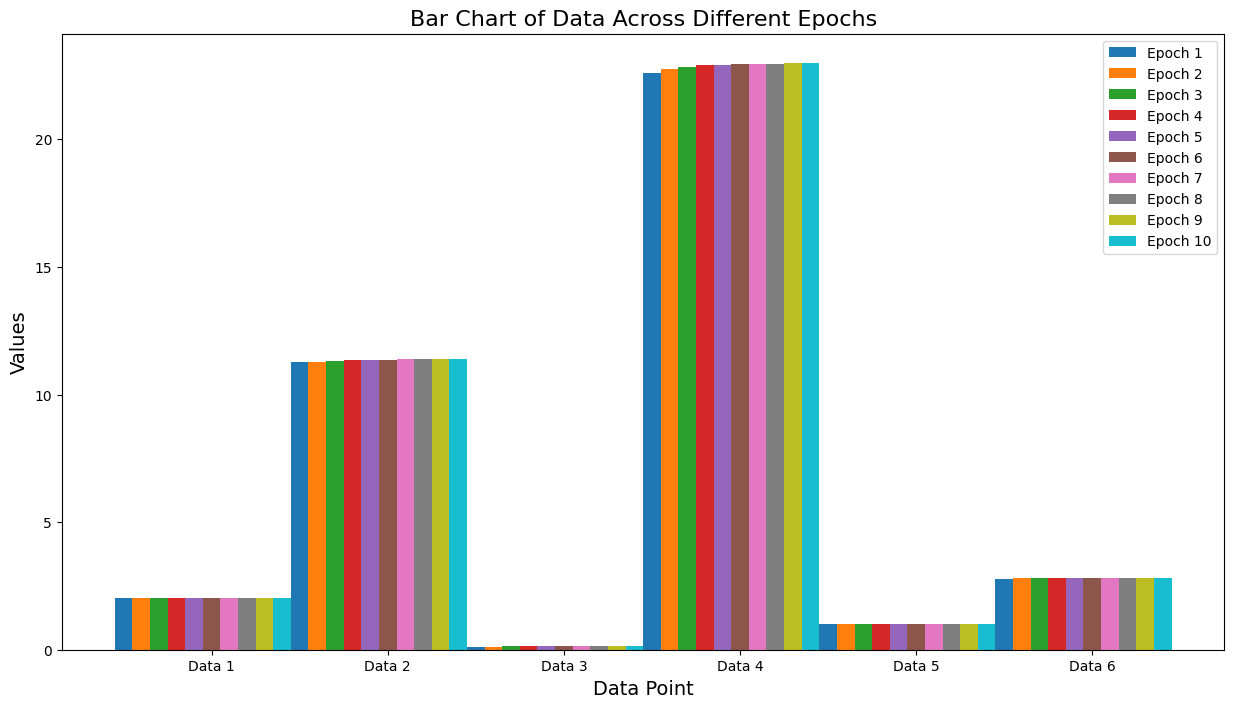

In [16]:
# Number of epochs
epochs = Time_AllRoundAvg.shape[0]
# Setting up the bar chart
fig, ax = plt.subplots(figsize=(15, 8))
# Width of a bar
bar_width = 0.1
# Creating an index for each set of bars
index = np.arange(Time_AllRoundAvg.shape[1])
# Plotting each epoch's data
for i in range(epochs):
    ax.bar(index + i*bar_width, Time_AllRoundAvg[i, :], bar_width, label=f'Epoch {i+1}')
# Adding labels and title
ax.set_xlabel('Data Point', fontsize=14)
ax.set_ylabel('Values', fontsize=14)
ax.set_title('Bar Chart of Data Across Different Epochs', fontsize=16)
ax.set_xticks(index + bar_width * epochs / 2)
ax.set_xticklabels([f'Data {i+1}' for i in range(Time_AllRoundAvg.shape[1])])
ax.legend()
# Showing the plot
plt.show()

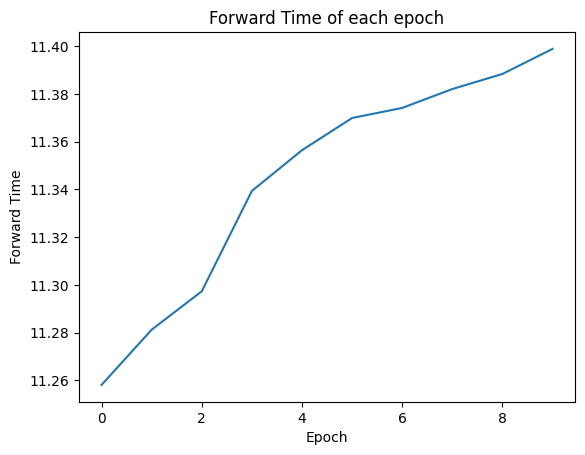

In [17]:
# plot the Forward time of each epoch using matplotlib with line in one figure
plt.plot(Time_AllRoundAvg[:,1].T)
plt.xlabel('Epoch')
plt.ylabel('Forward Time')
plt.title('Forward Time of each epoch')
plt.show()

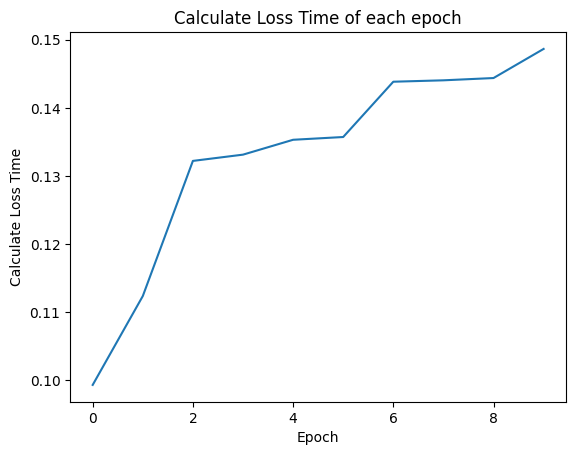

In [18]:
# plot the Calculate Loss of each epoch using matplotlib with line in one figure
plt.plot(Time_AllRoundAvg[:,2].T)
plt.xlabel('Epoch')
plt.ylabel('Calculate Loss Time')
plt.title('Calculate Loss Time of each epoch')
plt.show()

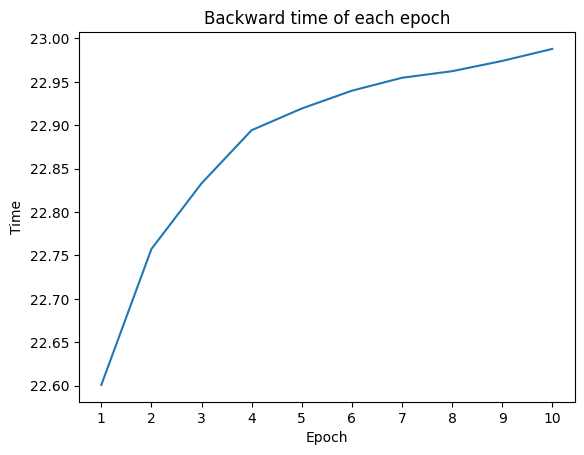

In [19]:
# plot the Backward time of each epoch using matplotlib with line in one figure
fig, ax = plt.subplots()
index = np.arange(10)
plt.plot(index, Time_AllRoundAvg[:,3].T)
plt.xlabel('Epoch')
plt.ylabel('Time')
plt.title('Backward time of each epoch')
plt.xticks(index, ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))
plt.show()

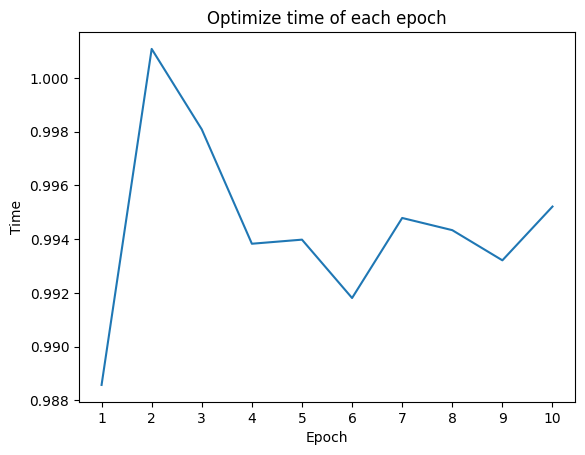

In [20]:
# plot the Optimize time of each epoch using matplotlib with line in one figure
fig, ax = plt.subplots()
index = np.arange(10)
plt.plot(index, Time_AllRoundAvg[:,4].T)
plt.xlabel('Epoch')
plt.ylabel('Time')
plt.title('Optimize time of each epoch')
plt.xticks(index, ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))
plt.show()

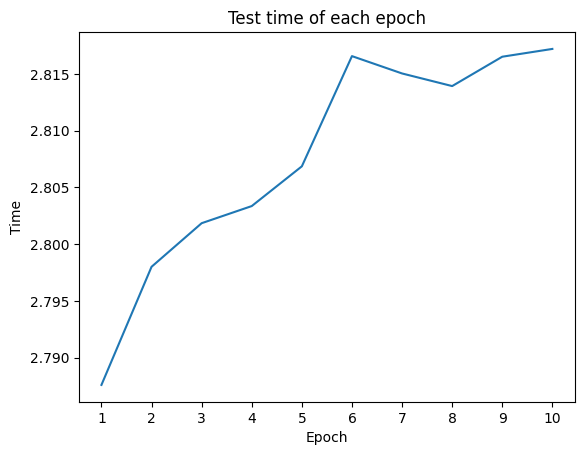

In [21]:
# plot the Test time of each epoch using matplotlib with line in one figure
fig, ax = plt.subplots()
index = np.arange(10)
plt.plot(index, Time_AllRoundAvg[:,5].T)
plt.xlabel('Epoch')
plt.ylabel('Time')
plt.title('Test time of each epoch')
plt.xticks(index, ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))
plt.show()

#### Energy_AllRound 

In [32]:
print(Energy_AllRound.shape)
# create a ndarray to store the average running time of each epoch
TimeRecorded_Total = np.zeros((Round,Epoch,1))
EnergyRecorded = np.zeros((Round,Epoch,1))
for i in range(len(Energy_AllRound)):
    # print('In round ', i+1, ': \n')
    for j in range(len(Energy_AllRound[i])):
        # print('Epoch ', j+1, 'The total recorded time is: ', len(Energy_AllRound[i][j][0]))
        TimeRecorded_Total[i,j,0] = len(Energy_AllRound[i][j][0])
        EnergyRecorded[i,j,0] = np.sum(Energy_AllRound[i][j][0])

(10, 10, 1)


In [34]:
print(TimeRecorded_Total.shape)
# print(TimeRecorded_Total)
TimeRecorded_Avg = np.sum(TimeRecorded_Total, axis=0)/Round
print(TimeRecorded_Avg.shape)
print(TimeRecorded_Avg.T)

print(EnergyRecorded.shape)
# print(EnergyRecorded)
EnergyRecorded_Avg = np.sum(EnergyRecorded, axis=0)/Round
print(EnergyRecorded_Avg.shape)
print(EnergyRecorded_Avg.T)

(10, 10, 1)
(10, 1)
[[43.  43.3 43.4 43.6 44.  44.  44.  44.  44.  44. ]]
(10, 10, 1)
(10, 1)
[[3313.446 3407.862 3423.266 3440.885 3473.211 3472.975 3473.507 3474.727
  3474.863 3475.345]]


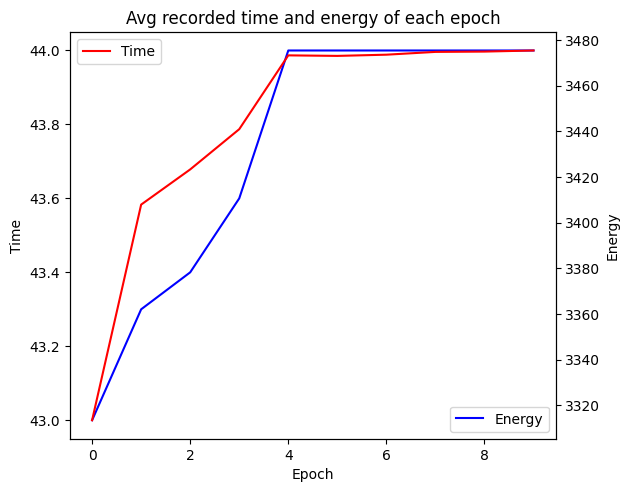

In [39]:
# plot the avg recorded time of each epoch and energy using matplotlib with line in one figure, the left axis is the time and the right axis is the energy
fig, ax1 = plt.subplots()
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Time')
ax1.plot(TimeRecorded_Avg, color='b')
plt.legend(['Energy'], loc='lower right')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
ax2.set_ylabel('Energy')
ax2.plot(EnergyRecorded_Avg, color='r')
ax2.tick_params(axis='y')
fig.tight_layout()
plt.title('Avg recorded time and energy of each epoch')
plt.legend(['Time'], loc='upper left')
plt.show()

#### TimeEpoch_AllRound

In [48]:
print(TimeEpoch_AllRound.shape)
# print(TimeEpoch_AllRound)

TimeEpoch_Round = np.zeros((Round,Epoch,1))
for i in range(TimeEpoch_AllRound.shape[0]):
    TimeEpoch_Roundi = TimeEpoch_AllRound[i,:,:]
    # print(TimeEpoch_Roundi.shape)
    time_temp = np.zeros((TimeEpoch_Roundi.shape[0],1))
    for j in range(TimeEpoch_Roundi.shape[0]):
        if j == 0:
            time_temp[j,0] = TimeEpoch_Roundi[j,0]
        else:
            time_temp[j,0] = TimeEpoch_Roundi[j,0] - TimeEpoch_Roundi[j-1,0]
    TimeEpoch_Round[i,:,:] = time_temp
    
print(TimeEpoch_Round.shape)
# print(TimeEpoch_Round)
TimeEpoch_RoundAvg = np.sum(TimeEpoch_Round, axis=0)/Round
print(TimeEpoch_RoundAvg.shape)
print('The average time of each epoch is: \n', TimeEpoch_RoundAvg.T)

(10, 10, 1)
(10, 10, 1)
(10, 1)
The average time of each epoch is: 
 [[42.63360896 42.90573716 43.01622536 43.12055855 43.16290705 43.21578081
  43.25533814 43.27089105 43.28503697 43.3117949 ]]


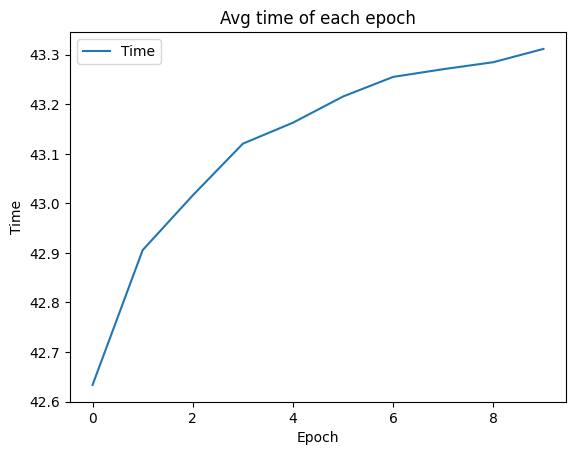

In [49]:
# plot the avg time of each epoch using matplotlib with line in one figure
plt.plot(TimeEpoch_RoundAvg)
plt.xlabel('Epoch')
plt.ylabel('Time')
plt.title('Avg time of each epoch')
plt.legend(['Time'], loc='upper left')
plt.show()

#### train loss, acc and test acc

In [51]:
print(TrainLoss_AllRound.shape)
print(TrainAcc_AllRound.shape)
print(TestAcc_AllRound.shape)

(10, 10, 1)
(10, 10, 1)
(10, 10, 1)


In [53]:
# get the average train loss of each epoch
TrainLoss_RoundAvg = np.sum(TrainLoss_AllRound, axis=0)/Round
print(TrainLoss_RoundAvg.shape)
print('The avg train loss of each epoch is: \n', TrainLoss_RoundAvg.T)

# get the average train accuracy of each epoch
TrainAcc_RoundAvg = np.sum(TrainAcc_AllRound, axis=0)/Round
print(TrainAcc_RoundAvg.shape)
print('The avg train acc of each epoch is: \n', TrainAcc_RoundAvg.T)

# get the average test accuracy of each epoch
TestAcc_RoundAvg = np.sum(TestAcc_AllRound, axis=0)/Round
print(TestAcc_RoundAvg.shape)
print('The avg test acc of each epoch is: \n',TestAcc_RoundAvg.T)

(10, 1)
The avg train loss of each epoch is: 
 [[1.34207057 0.65152898 0.5369289  0.47245839 0.43010348 0.39917682
  0.37620743 0.3572498  0.34205284 0.32891387]]
(10, 1)
The avg train acc of each epoch is: 
 [[0.50200333 0.75566833 0.79976833 0.82587167 0.84204333 0.853595
  0.86243667 0.86929667 0.87494833 0.87920333]]
(10, 1)
The avg test acc of each epoch is: 
 [[0.73876 0.78627 0.82101 0.83853 0.84914 0.85807 0.86665 0.8727  0.87655
  0.87992]]


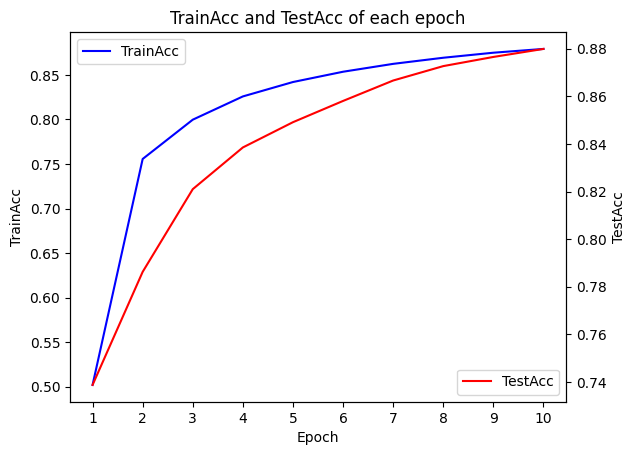

In [54]:
# plot the TrainAcc and TestAcc of each epoch using matplotlib with line in one figure, the left y-axis is for TrainAcc and the right y-axis is for TestAcc
# add the legend for TrainAcc and TestAcc, put it to the bottom right
fig, ax1 = plt.subplots()
index = np.arange(10)
plt.plot(index, TrainAcc_RoundAvg, 'b-')
plt.xlabel('Epoch')
plt.ylabel('TrainAcc')
plt.legend(['TrainAcc'], loc='upper left')
plt.title('TrainAcc and TestAcc of each epoch')
plt.xticks(index, ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))

ax2 = ax1.twinx()
plt.plot(index, TestAcc_RoundAvg, 'r-')
plt.ylabel('TestAcc')
plt.legend(['TestAcc'], loc='lower right')
plt.show()
